In [66]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [67]:
X,y = make_blobs(1000,2,centers=2)

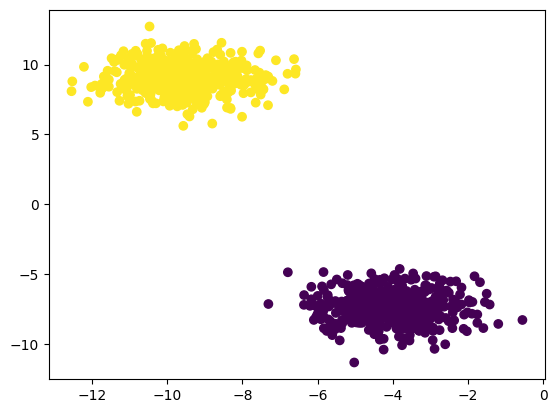

In [68]:
plt.scatter(X[:,0],X[:,1],c=y)

In [70]:
class MLP:
    def __init__(self,InputL,hiddenLayers,OutputL):

        self.weights = []
        self.bias = []

        self.weights.append(np.zeros((InputL,hiddenLayers[0])))
        self.bias.append(np.zeros((hiddenLayers[0],)))

        for i in range(1,len(hiddenLayers)):
            self.weights.append(np.zeros((hiddenLayers[i-1],hiddenLayers[i])))
            self.bias.append(np.zeros((hiddenLayers[i],)))

        self.weights.append(np.zeros((hiddenLayers[-1],OutputL)))
        self.bias.append(np.zeros((OutputL,)))

    def activation(self,Z):
        return 1/(1+np.exp(-Z))

    def fit(self,X,y,lr = 0.01,epochs = 1000):
        self.backward(X,y,lr,epochs)

    def predict(self,X):
        ypred = self.forward(X)
        ypred[ypred >= 0.5] = 1
        ypred[ypred < 0.5] = 0
        return ypred
        
    def forward(self,X):
        
        a = X
        self.output = [a]
        for i in range(len(self.weights)):
            z = a@self.weights[i] + self.bias[i]
            a = self.activation(z)
            self.output.append(a)
            
        return a

    def derA(self,Z):
        return Z*(1-Z)

    def backward(self,X,y,lr = 0.01,epochs = 100):

        for e in range(epochs):
            ypred = self.forward(X)
    
            delta = [ypred - y]
            gradw = [self.output[-2].T@delta[-1]]

            for i in range(len(self.weights)-1,0,-1):
                delta.append((delta[-1]@self.weights[i].T)*self.derA(self.output[i]))
                gradw.append(self.output[i-1].T@delta[-1])


            wn = len(self.weights)-1
            
            for i in range(len(gradw)):
                self.weights[wn] = self.weights[wn] - lr*gradw[i]
                self.bias[wn] = self.bias[wn] - lr*np.sum(delta[i],axis = 0)
                wn -= 1

In [88]:
clf = MLP(2,[4,3,6],1)

In [89]:
y.shape

(1000,)

In [90]:
clf.fit(X,y.reshape((-1,1)))

In [91]:
np.mean(clf.predict(X).reshape(-1)==y)

np.float64(0.5)

In [92]:
# X = np.array([[1,2,3],[4,5,6]])
# clf.forward(X)

In [93]:
# clf.backward(X,np.array([[1],[0]]))

In [94]:
clf.weights

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])]

In [95]:
clf.bias

[array([0., 0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0.])]